<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_60_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 60: Support Vector Machines - MNIST Digits Classification


In this class, you will learn to classify images using SVM. In particular, you will learn to classify the images of handwritten digits using SVM.


**Data Description**

For this problem, we will use the **Modified National Institute of Standards and Technology database** i.e. **MNIST** data which is a huge dataset containing handwritten digits. We don't have actual images rather we have its pixels.

Since each image has $28 \times 28$ pixels and each pixel form a feature. There are 784 features. These features are recorded in CSV files. One for the training a model and another for testing the model. The **pixel values** of each digit (image) comprise the features, and the actual number between 0 and 9 is the label.





# Pixel

A pixel (short for "picture element") is the smallest unit of an image that can be displayed and processed. It represents a single point in a digital image, and its color and brightness are defined by numerical values.

Key Concepts:

**Pixel in Grayscale Images:**

- Each pixel has a single value that represents the intensity of the light at that point.
- Typically, grayscale images use values between 0 (black) and 255 (white) for 8-bit images. Intermediate values represent shades of gray.

**Pixel in RGB (Color) Images:**

- Each pixel is represented by three values: one for Red, one for Green, and one for Blue.
- These three values combine to form the final color of the pixel using the RGB color model.
- In most cases, the values of each channel range from 0 to 255 in 8-bit images, representing no intensity (0) to full intensity (255) of that color.

**How Many Pixels Does an Image Have?**

The number of pixels in an image is determined by its resolution, which is typically represented as width x height (in pixels). For example:

- 1920 x 1080 image has 1920 pixels horizontally and 1080 pixels vertically.
- Total pixels = 1920 * 1080 = 2,073,600 pixels.
- The more pixels an image has, the higher its resolution and the more detail it can contain.

**How Pixels Work in Random Images:**

In a randomly generated image (e.g., using numpy), each pixel is assigned a random value. For example:

- In a grayscale image, each pixel might have a random intensity value between 0 and 255.
- In an RGB image, each pixel might have three random values representing random intensities for the Red, Green, and Blue channels.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
random_image = np.random.randint(0, 256, (2,5))
random_image

array([[110,   0, 250, 251, 254],
       [106,  78, 181,  75, 122]])

In [ ]:
random_image = np.random.randint(0, 256, (100, 100))
random_image

array([[118,  17,  16, ...,  98,  31,  13],
       [  3, 206, 214, ...,   4,  10,  35],
       [ 73,  20, 254, ...,  73, 227, 246],
       ...,
       [ 68, 180, 112, ..., 212,  90, 130],
       [ 78, 233, 183, ...,  43,  70,  25],
       [212,  15,  27, ...,  58, 181, 208]])

[[ 55 202  46  16  53  77   4 175 130 252]
 [198 228 164 186 144 184 191 192 114 116]
 [ 88 187  69 219 190 146 111 156  79 133]
 [141 157  21 232  30   2  64  90  98 238]
 [185 150  19  63  50 136 224 102 236  59]
 [237 110  21  54 156 157  23 237 198  13]
 [202 112 137 149 232  64 194 125 220   7]
 [118  56 183  30  97  98 110 189 252  60]
 [ 28 112  16 113  66 247 178 182  11 132]
 [181  36  77  14 214 156 191 202  19 103]]


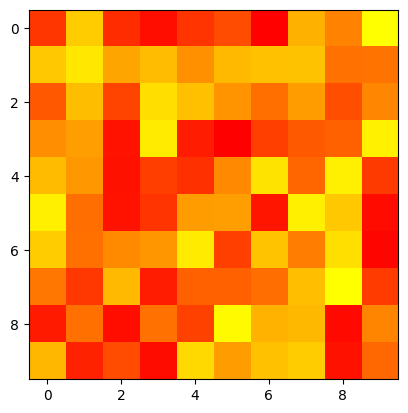

In [ ]:
# Generate a random 100x100 grayscale image
import numpy as np
import matplotlib.pyplot as plt

random_image = np.random.randint(0, 256, (10, 10))
print(random_image)
plt.imshow(random_image, cmap='autumn')
plt.show()

In this example, the image has 100 x 100 pixels = 10,000 pixels, each assigned a random grayscale value between 0 and 255.

In [ ]:
# Generate a random 100x100 RGB image

random_rgb_image = np.random.randint(0, 256, (2, 2, 3))
print(random_rgb_image )
plt.imshow(random_rgb_image)
plt.show()

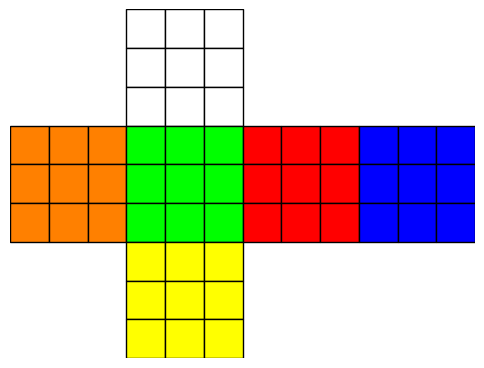

In [ ]:

# Initialize the Rubik's Cube in 6 faces, each face 3x3
# Faces are in the following order: [Up, Left, Front, Right, Back, Down]
colors = {
    'W': [1, 1, 1],   # White
    'R': [1, 0, 0],   # Red
    'B': [0, 0, 1],   # Blue
    'G': [0, 1, 0],   # Green
    'Y': [1, 1, 0],   # Yellow
    'O': [1, 0.5, 0]  # Orange
}

# Initialize each face with its respective color
cube = {
    'U': np.full((3, 3), 'W'),  # Up face is White
    'L': np.full((3, 3), 'O'),  # Left face is Orange
    'F': np.full((3, 3), 'G'),  # Front face is Green
    'R': np.full((3, 3), 'R'),  # Right face is Red
    'B': np.full((3, 3), 'B'),  # Back face is Blue
    'D': np.full((3, 3), 'Y')   # Down face is Yellow
}

# Function to plot a 3x3 face
def plot_face(ax, face, x_offset=0, y_offset=0):
    for i in range(3):
        for j in range(3):
            ax.add_patch(
                plt.Rectangle((x_offset + j, y_offset + 2 - i), 1, 1,
                              facecolor=colors[face[i, j]], edgecolor='black')
            )

# Plotting the unfolded Rubik's Cube
fig, ax = plt.subplots(figsize=(6, 6))

# Plot all 6 faces in a 2D "unfolded" configuration
plot_face(ax, cube['U'], 3, 6)  # Up face
plot_face(ax, cube['L'], 0, 3)  # Left face
plot_face(ax, cube['F'], 3, 3)  # Front face
plot_face(ax, cube['R'], 6, 3)  # Right face
plot_face(ax, cube['B'], 9, 3)  # Back face
plot_face(ax, cube['D'], 3, 0)  # Down face

# Set the plot limits and grid
ax.set_xlim(0, 12)
ax.set_ylim(0, 9)
ax.set_aspect('equal')
ax.axis('off')  # Hide the axes
plt.show()

In [ ]:
def rotate_face_90_clockwise(face):
    return np.rot90(face, -1)  # Rotate 90 degrees clockwise

# Rotate front face
cube['F'] = rotate_face_90_clockwise(cube['F'])

# Update visualization
fig, ax = plt.subplots(figsize=(6, 6))
plot_face(ax, cube['U'], 3, 6)
plot_face(ax, cube['L'], 0, 3)
plot_face(ax, cube['F'], 3, 3)
plot_face(ax, cube['R'], 6, 3)
plot_face(ax, cube['B'], 9, 3)
plot_face(ax, cube['D'], 3, 0)
ax.set_xlim(0, 12)
ax.set_ylim(0, 9)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

Here, the image still has 100 x 100 = 10,000 pixels, but each pixel has 3 values (one for Red, Green, and Blue channels).

**Image Resolution and Pixel Count:**

- Low-resolution images: Fewer pixels (e.g., 640x480 = 307,200 pixels) result in less detail.
- High-resolution images: More pixels (e.g., 4K image with 3840x2160 = 8,294,400 pixels) offer more detail.

**Visual Appearance:**

The more pixels per unit area, the smoother and more detailed the image will appear. Fewer pixels can make the image look blocky or pixelated.

###`plt.imshow()` Function:

`plt.imshow()` is a function from the matplotlib.pyplot library, used to display images in a figure. It is especially useful when working with image data in Python, such as with image arrays. Here's a quick breakdown of its functionality:


Basic Usage:

`plt.imshow()` takes in image data, typically as a 2D or 3D array. A 2D array represents grayscale images, while a 3D array typically represents RGB images.



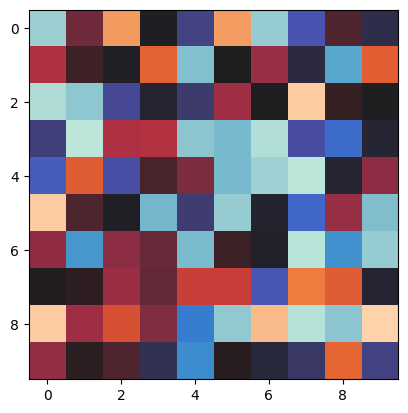

In [ ]:
# Example with a 2D array (grayscale image)
image = np.random.random((10, 10))
plt.imshow(image, cmap='icefire')
plt.show()

Parameters:

- X: The image data, which could be a 2D (grayscale) or 3D (color) array.
- cmap: The colormap to apply, commonly used for grayscale images (e.g., 'gray', 'viridis', etc.). This is ignored if you're displaying an RGB or RGBA image.
- interpolation: Determines how pixel values are interpolated when the image is resized (e.g., 'nearest', 'bilinear').
- vmin and vmax: Used to normalize the data. Values below vmin are set to the lowest color, and values above vmax are set to the highest color.
- aspect: The aspect ratio of the image ('auto', 'equal', etc.).

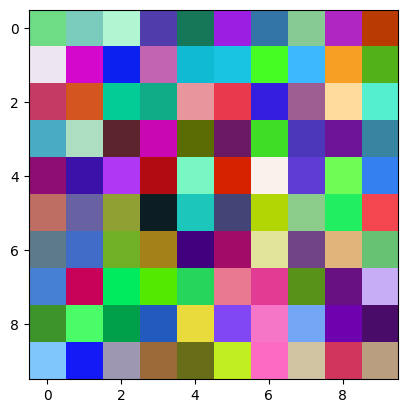

In [ ]:
# Example with a 3D array (RGB image)
image_rgb = np.random.random((10, 10, 3))
plt.imshow(image_rgb)
plt.show()

Here, the image_rgb data is in the form of a 3D array where each pixel is represented by a combination of Red, Green, and Blue channels.

In RGB color formation, each pixel's color is defined by three numbers representing the intensities of Red, Green, and Blue. These values usually range from 0 to 255, where:

- 0 means no intensity of that color.
- 255 means full intensity of that color.

The combination of these three values produces a wide variety of colors.

**Key RGB Color Examples:**

Red: [255, 0, 0]

- Full red, no green, no blue.
- Output: Pure red.

Green: [0, 255, 0]

- No red, full green, no blue.
- Output: Pure green.

Blue: [0, 0, 255]

- No red, no green, full blue.
- Output: Pure blue.

White: [255, 255, 255]

- Full intensity of red, green, and blue.
- Output: White.

Black: [0, 0, 0]

- No red, no green, no blue.
- Output: Black.

Yellow: [255, 255, 0]

- Full red, full green, no blue.
- Output: Yellow (red + green = yellow).

Cyan: [0, 255, 255]

- No red, full green, full blue.
- Output: Cyan (green + blue = cyan).

Magenta: [255, 0, 255]

- Full red, no green, full blue.
- Output: Magenta (red + blue = magenta).

Gray: [128, 128, 128]

- Equal intensities of red, green, and blue.
- Output: Medium gray.

Orange: [255, 165, 0]

- Full red, some green, no blue.
- Output: Orange.

Purple: [128, 0, 128]

- Medium red, no green, medium blue.
- Output: Purple.

How Colors Mix:

Additive Color Model: When you mix full intensities of different colors, they add up to form lighter colors. For example:
- Red + Green = Yellow
- Red + Blue = Magenta
- Green + Blue = Cyan
- Red + Green + Blue = White

You can create various shades and tones by varying the intensities of the red, green, and blue channels.



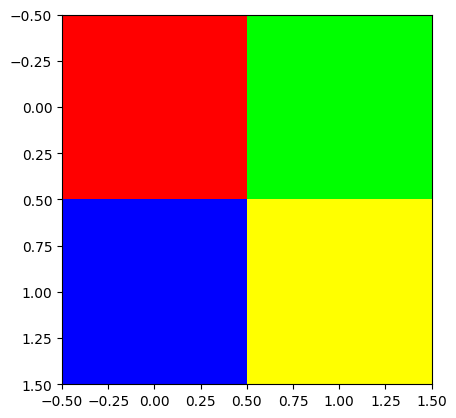

In [ ]:
# Create a 2x2 image with different RGB colors
image_rgb = np.array([[[255, 0, 0], [0, 255, 0]],    # Red, Green
                      [[0, 0, 255], [255, 255, 0]]]) # Blue, Yellow

plt.imshow(image_rgb)
plt.show()

---

#### Activity 1: Loading Data

Let's load both the training and the test datasets. Here are the links to the required two CSV files:

**Dataset credits:**
```
LeCun, Y., Cortes, C., & Burges, C. (2010). MNIST handwritten digit database. ATT Labs [Online].
 http://yann.lecun.com/exdb/mnist/
 ```

In [ ]:
dummy = pd.read_csv("/content/sample_data/mnist_test.csv")
dummy

In [ ]:
#  Import the libraries and load the CSV files.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_csv_path = "/content/train (1).csv"
test_csv_path = "/content/test (1).csv"
train_df = pd.read_csv(train_csv_path) #reading the csv files using pandas
test_df = pd.read_csv(test_csv_path)

Now, get the information on the both DataFrames:

In [ ]:
150*4

600

In [ ]:
42000*785

32970000

In [ ]:
# Get the information on the train dataset.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


There are 42000 rows and 785 columns in the train dataset:

In [ ]:
# Get the information on the test dataset.
test_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18235 entries, (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 57, 239, 254, 154, 16, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 237, 253, 253, 253, 254, 196, 97, 32, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 239, 247, 150, 67, 151, 224, 253, 253, 253, 224, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 125, 254, 131, 0, 0, 0, 12, 66, 111, 191, 253, 120, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 233, 2

There are 28000 rows and 784 columns in the test dataset. This means we don't have the labels column for the test set. You verify this by printing the first and last five columns of the test set:

In [ ]:
# Print the first and last five columns of both the test and train datasets.
print(f"Test set:\n{'-' * 100}\nFirst five columns -> {list(test_df.columns[:5])}\nLast five columns -> {list(test_df.columns[-5:])}\n")
print(f"Train set:\n{'-' * 100}\nFive five columns -> {list(train_df.columns[:5])}\nLast five columns -> {list(train_df.columns[-5:])}")

Test set:
----------------------------------------------------------------------------------------------------
First five columns -> ['254', '216', '0', '0.1', '0.2']
Last five columns -> ['0.191', '0.192', '0.193', '0.194', '0.195']

Train set:
----------------------------------------------------------------------------------------------------
Five five columns -> ['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3']
Last five columns -> ['pixel779', 'pixel780', 'pixel781', 'pixel782', 'pixel783']


As you can see, the train set has the `label` column but the test set doesn't.

Now, let's print the first ten rows of the DataFrame containing the train set:

In [ ]:
# Print the first ten rows of the DataFrame containing the train set.
train_df.head(10) # printing first ten columns of train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see:

- The first row contains the pixel values of the image of the handwritten digit $1$.

- Similarly, the second row contains the pixel values of the image of the handwritten digit $0$.

- Similarly, the third row contains the pixel values of the image of the handwritten digit $1$.


$$\vdots$$

- The $10^{\text{th}}$ row contains the pixel values of the image of the handwritten digit $3$.

Let's print the image of the digit $4$.


---

#### Activity 2: The `matplotlib.pyplot.imshow()` Function

To display an image from its pixel values, you can use the `imshow()` function of the `matplotlib.pyplot` module. So, to create the image of the digit 4 from its pixel values, we will follow the steps given below:

1. Create a 1D array containing the pixel values from the training DataFrame for the image and store it in a variable.

2. Reshape the above array into a 2D array having 28 rows and 28 columns.

3. Use the `imshow()` function of the `matplotlib.pyplot` module and pass the following inputs to the function:
   - The $28 \times 28$ array containing the pixel values of an image.
   
   - The colour mapping value for the image. We will create a grayscale image hence, we will set the colormapping value using the parameters `cmap = 'gray', vmin = 0, vmax = 255`.

   **Note:** There are other parameters that can be passed to `imshow()` function as inputs. But for now, we will pass the above parameters only.

4. Provide the title to the image.



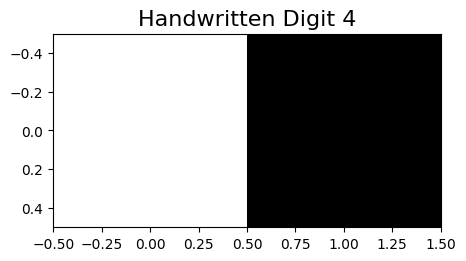

In [ ]:
plt.figure(figsize = (5, 5))
plt.title("Handwritten Digit 4", fontsize = 16)
plt.imshow([(255,0)],cmap="gray")
plt.show()

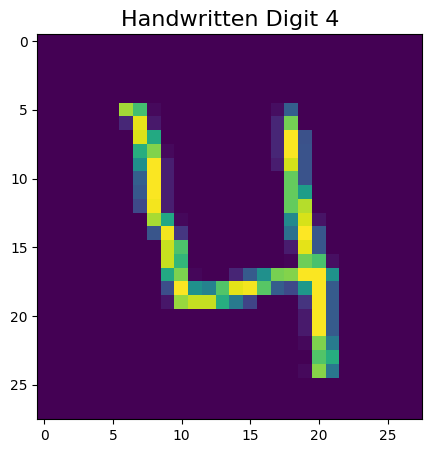

In [ ]:
four_pixels = train_df.iloc[3, 1:]
four_pixels = np.array(four_pixels).reshape(28, 28) # The 'values' attrtibute gets the values of the Pandas series in the form of a NumPy array.

plt.figure(figsize = (5, 5))
plt.title("Handwritten Digit 4", fontsize = 16)
plt.imshow(four_pixels)
plt.show()

In [ ]:
four_pixels

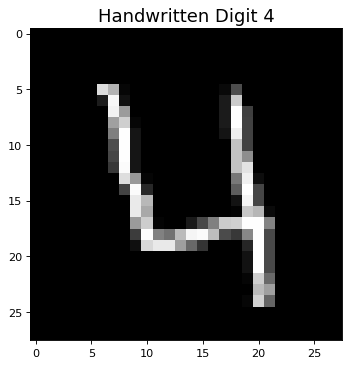

In [ ]:
# Display the image of the handwritten digit 4 from the train DataFrame.
four_pixels = train_df.iloc[3, 1:]
four_pixels = four_pixels.values.reshape(28, 28) # The 'values' attrtibute gets the values of the Pandas series in the form of a NumPy array.

plt.figure(figsize = (5, 5), dpi = 81)
plt.title("Handwritten Digit 4", fontsize = 16)
plt.imshow(four_pixels, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

In the above code:

- `four_pixels = train_df.iloc[3, 1:]` part gets the pixel values of the image of the digit 4 that are stored in the $4^{\text{th}}$ row of the DataFrame.

- `four_pixels = four_pixels.values.reshape(28, 28)` part first gets the pixel values from the Pandas series in the form of a NumPy array and then reshapes the 1D array into a 2D array having 28 rows and 28 columns.

- `plt.figure(figsize = (5, 5), dpi = 81)` part sets the figure size.

- `plt.title("Handwritten Digit 4", fontsize = 16)` part sets the title of the plot.

- `plt.imshow(four_pixels, cmap = 'gray', vmin = 0, vmax = 255)` part creates a 2D image in gray colour.

If you look at the axes of the above image, you can see that nearly the first four and last three rows are blank. Similarly, the first five and last five columns are blank which is denoted by the black colour.

So let's print the rows 5 to 26 and columns 5 to 25 of the `four_pixel` NumPy array to see the pixel values of the image of the handwritten digit 4:


When you set `cmap='gray' `in plt.imshow(), the color mapping changes to grayscale, meaning the pixel values are mapped to shades of gray instead of colors. Here’s what happens:

What cmap='gray' Does:

- It tells matplotlib to interpret the pixel values as intensities of gray, rather than RGB color values.
- Higher values are mapped to brighter (whiter) shades.
- Lower values are mapped to darker (black) shades.

Grayscale Mapping:

For a 2D array (which represents the intensity of pixels):

- 0 is mapped to black.
- Maximum value (e.g., 255) is mapped to white.
- Values in between are mapped to different shades of gray.

In [ ]:
# 2D array with intensity values
image = np.array([[0, 50, 100], [150, 200, 255]])

plt.imshow(image, cmap='gray')
plt.show()

Behavior with 3D Arrays (RGB Images):

If you try to use `cmap='gray'` with a `3D RGB array`, it won't work because cmap is ignored when the input is an RGB image. Grayscale colormap is only applied to 2D data.

Why Use `cmap='gray'`?

- Visualization of Grayscale Images: It's ideal for displaying medical images (like MRI scans), heatmaps, and other data where intensity matters more than color.
- Simplified Representation: You can turn multichannel data (like an RGB image) into a simpler intensity-based visual.

In [ ]:
#  Print the rows 5 to 26 and columns 5 to 25 of the 'four_pixel' NumPy array to see the pixel values of the image of the handwritten digit 4.
print(four_pixels[3:-2,5:-5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169

From the above output, you can see the non-zero pixel values arranged in the pattern of digit 4.

**It is to be noted that the pixel values for a grayscale image range from 0 to 255.**

You can also look at the descriptive statistics for the first 10 images in the train DataFrame.

---


#### Activity 3: The `pandas.set_index()` Function

Before printing the descriptive statistics values of the first 10 images in the train DataFrame, let's learn the `set_index()` function of the `pandas` module. It is used to set another column or 1D array as an index of a Pandas DataFrame.

**Syntax:** `pandas_dataframe.set_index(keys, inplace = False)`

Where,

- `keys` is an existing column in a `pandas_dataframe` or a new Pandas series having the same length as the number of rows in `pandas_dataframe`.
- `inplace` is a parameter that defines whether the indices to be set temporarily (locally) or permanently (globally). `inplace = False` means set index temporarily (locally)

In [ ]:
train_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#  Set the indices of the 'train_df' DataFrame temporarily to the values in the 'label' column.
train_df.set_index('label', inplace = False)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, the indices of the `train_df` are the values of the `label` column. To verify whether the change is temporary, you may print the first five rows of the `train_df` DataFrame again:

In [ ]:
# Print the first-five rows of the 'train_df' DataFrame.
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see, the indices of the `train_df` are consecutive whole numbers.

You can set any other values as indices of a Pandas DataFrame. So let's test this theory by temporarily setting `row 0, row 1, row 2 ... ` values as indices of the `train_df` DataFrame:

In [ ]:
train_df.shape[0]

42000

In [ ]:
[ "row " + str(i) for i in range(42000)]

In [ ]:
# Create a Pandas series containing the 'row 0, row 1, row 2 ...' values.
new_indices = pd.Series(["row " + str(i) for i in range(train_df.shape[0])])
new_indices.head()

,0
0,row 0
1,row 1
2,row 2
3,row 3
4,row 4


In [ ]:
n = []
for i in range(42000):
    n.append("row "+ str(i))
n = pd.Series(n)
n


,0
0,row 0
1,row 1
2,row 2
3,row 3
4,row 4
...,...
41995,row 41995
41996,row 41996
41997,row 41997
41998,row 41998


In [ ]:
train_df.set_index(n)

Now replace the original indices with the values stored in the above Pandas series:

In [ ]:
#  Temporarily replace the original indices with the values stored in the above Pandas series.
train_df.set_index(new_indices, inplace = False)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
row 0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
row 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
row 2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
row 3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
row 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
row 41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
row 41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
row 41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
row 41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.set_index([n,"label"],inplace=False)

Now let's calculate the mean, std, min, quartiles, and max values of the pixels of the first 10 images present in the `train_df` DataFrame:

In [ ]:
train_df["label"].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


In [ ]:
#Print descriptive statistics for the pixel values of first 10 images in the train DataFrame.
train_df.set_index('label').head(10).T.describe() # Setting the 'label' as index column from the DataFrame.

label,1,0,1,4,0,0,7,3,5,3
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,21.235969,56.899235,17.123724,19.164541,65.169643,29.414541,21.877551,30.979592,35.612245,40.267857
std,64.660241,99.211727,59.658939,57.787051,104.862304,72.981989,63.035499,70.651698,80.562012,84.928290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,66.250000,0.000000,0.000000,131.500000,0.000000,0.000000,0.000000,0.000000,0.000000
max,255.000000,255.000000,255.000000,255.000000,254.000000,255.000000,255.000000,255.000000,255.000000,255.000000


As you can see, the pixel values for a grayscale image goes from 0 to 255.

Now, to practice the usage of the `imshow()` function, let's create an image of another handwritten digit, say $6$ from the pixel values of its image. For this, first, you will have to get the rows that contain the pixel values of the images of $6$:


In [ ]:
#  Create a DataFrame from the training DataFrame that contain the pixel values of the images of the digit 6.
six_pixels_train_df = train_df.loc[train_df['label'] == 6, :]
six_pixels_train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41921,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41927,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41967,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, from the above DataFrame, let's create an image of the first instance of the image of digit $6$. Its index is 21:

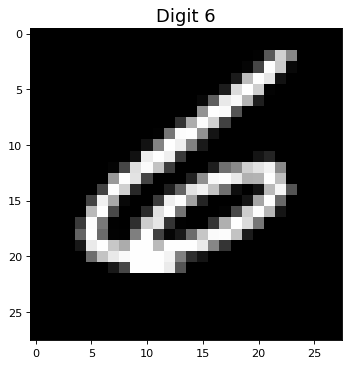

In [ ]:
#  Create an image from the pixel values of the image of the digit 6 that are stored in row 21.
six_pixels = train_df.iloc[21, 1:]
six_pixels = six_pixels.values.reshape(28, 28)

plt.figure(figsize = (5, 5), dpi = 81)
plt.title("Digit 6", fontsize = 16)
plt.imshow(six_pixels, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

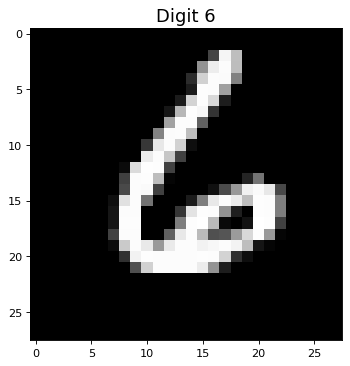

In [ ]:
#  Create an image from the pixel values of the image of the digit 6 that are stored in row 21.
six_pixels = train_df.iloc[41998, 1:]
six_pixels = six_pixels.values.reshape(28, 28)

plt.figure(figsize = (5, 5), dpi = 81)
plt.title("Digit 6", fontsize = 16)
plt.imshow(six_pixels, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

Now, let's print the part of the array containing the pixel values of the above image such that their arrangement resembles the digit 6:

In [ ]:
# Print the rows 2 to 22 and columns 5 to 21 of the 'six_pixels' array.
print(six_pixels[2:23, 5:22])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2  89]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  70 254]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  27 189 254 230]
 [  0   0   0   0   0   0   0   0   0   0   0   0  28 219 255 206   3]
 [  0   0   0   0   0   0   0   0   0   0   8  94 233 248 179  31   0]
 [  0   0   0   0   0   0   0   0   0   0 146 254 251  84   0   0   0]
 [  0   0   0   0   0   0   0   0  51 173 252 209  65   0   0   0   0]
 [  0   0   0   0   0   0   2 119 252 254 146  20   0   0   0   0   0]
 [  0   0   0   0   0  18 131 254 239 130  25   0   0   0   0   0   0]
 [  0   0   0   0  17 237 254 239  58   0   0   0   0   0   0  20  36]
 [  0   0   4  70 223 251 196  61   0   0   0  30 112 138 207 226 242]
 [  0   0 153 254 228  68   0   0   0  34 143 249 254 233 177 179 254]
 [  0  67 253 208  40   0   0  31  99 226 241 195 112  14   0  18 186]
 [ 67 241 168   8   0   0  60 239 253 161  37   0   0   0  20 165 254]
 [185 

Now, for a machine learning algorithm (in this case, SVM), to correctly identify an image for a digit, it has to figure out the arrangement of pixel values for a digit on a 2D grid (in this case, $28 \times 28$ grid).

Knowing this, we can now build a machine learning model (in this case, SVM) to classify the images of different handwritten digits.


---

#### Activity 4: Check for Data Imbalance

Before building a classification model, let's check whether the training dataset is imbalanced or not:

In [ ]:
# Find out the counts of records for each digit in the training dataset.
train_df['label'].value_counts(dropna = False, normalize = True)*100

,proportion
label,
1,11.152381
7,10.478571
3,10.359524
9,9.971429
2,9.945238
6,9.850000
0,9.838095
4,9.695238
8,9.673810


In [ ]:
train_df['label'].value_counts()

,count
label,
1,4684
7,4401
3,4351
9,4188
2,4177
6,4137
0,4132
4,4072
8,4063


**Note:**

1. The `dropna = False` parameter counts the number of `NA` or `null` values if they are present in a Pandas series.

2. The `normalize = True` parameter calculates the count of a value as the fraction of the total number of records.
(The normalize parameter changes the form of the output.By default, value_counts shows the count of the unique values.But if you set normalize = True, value_counts will display the proportion of total records instead of the raw count.)



From the count of labels, we can see that the training dataset is balanced. Hence, we can now proceed to build a classification model.

----

In the previous activities, you learn to visualise a grayscale image using its pixel values. Next activities, you will learn the following:

1. Normalise the pixel value of an image.
2. Build an SVM model using the linear kernel to classify images.



#### Activity 1: Feature Scaling or Normalisation

Now that we have ensured that there is no data imbalance, let's scale down the pixel values of each image because the support vector machines is sensitive to the numeric data. Also, in the case of large values, the time taken to train an SVM model will be high.  

So let's divide each pixel value for each image by 255 (the greatest pixel value for a grayscale image) to reduce the values between 0 and 1.



In [ ]:
# Create features and target data frames and divide each pixel for each image by 255.0
features_train = train_df.iloc[:, 1:] / 255.0
target_train_actual = train_df['label']

features_train.set_index(keys = target_train_actual, inplace = False).T.describe()

label,1,0,1,4,0,0,7,3,5,3,...,3,1,9,6,4,0,1,7,6,9
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,...,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.083278,0.223134,0.067152,0.075155,0.255567,0.115351,0.085794,0.121489,0.139656,0.157913,...,0.107198,0.108373,0.143467,0.172814,0.160399,0.146609,0.067102,0.157583,0.131958,0.090926
std,0.253570,0.389066,0.233957,0.226616,0.411225,0.286204,0.247198,0.277065,0.315929,0.333052,...,0.277096,0.296034,0.320572,0.351216,0.336728,0.316209,0.236696,0.342426,0.309785,0.249467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.259804,0.000000,0.000000,0.515686,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000


As you can see, the maximum pixel value of all the images is 1 (or nearly 1) instead of 255 (or 254).

In the code,

```
features_train.set_index(keys = target_train_actual, inplace = False).T.describe()
```

we first set the indices of the `features_train` data frame to the image labels (or digits) using the `set_index()` function, then the `T` attribute is used to take transpose (interchange of rows and columns) of the data frame and then on the transposed data frame, the `describe()` function is called to get min, max etc values for each image label pixel values.

---

#### Activity 2: Model Building

Let's build a preliminary SVM classification model to classify the images of digits.

**Note:** Since there are 42000 training samples (or image samples or rows), the SVC model will take some time (about 4 to 6 minutes) to train.



In [ ]:
#  Build an SVC model with the linear kernel.
from sklearn.svm import SVC

svc_clf_linear1 = SVC(kernel = "linear")
svc_clf_linear1.fit(features_train, target_train_actual)

SVC(kernel='linear')

Now that we have built a classification model using support vector machines, let's get the predicted digts and them compare the predicted values with the actual values.

**Note:** The code below may take 3 to 5 minutes to execute.

In [ ]:
# Predict the target values for the training set.
target_train_predicted = svc_clf_linear1.predict(features_train)
target_train_predicted

array([1, 0, 1, ..., 7, 6, 9])

Now let's create a confusion matrix to check for misclassification.

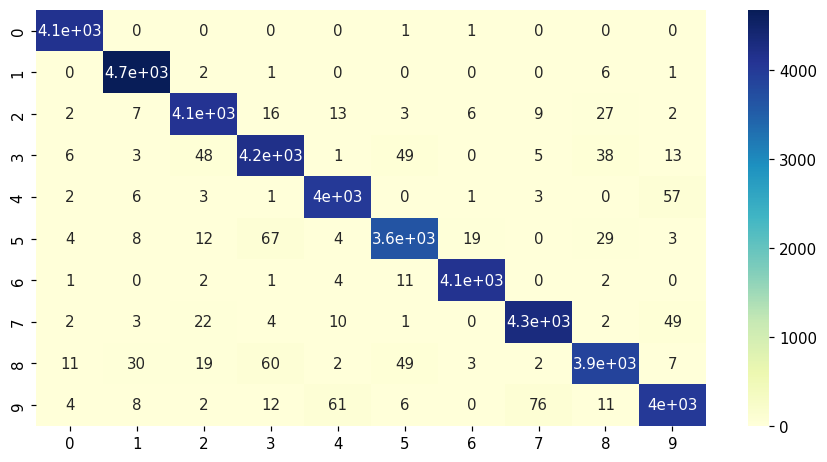

In [ ]:
#  Create a confusion matrix to check for misclassification.
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(target_train_actual, target_train_predicted)
cm_df = pd.DataFrame(cm, index = np.arange(10), columns = np.arange(10))

plt.figure(figsize = (10, 5), dpi = 108)
sns.heatmap(data = cm_df, annot = True, cmap = 'YlGnBu')
plt.show()

From the above confusion matrix, you can see that the count of the correct classification of all the digits is on the scale of $10^3$. Compared to them, misclassification counts are negligible.

Let's print the precision, recall and f1-score values to further evaluate the efficacy of the model.

In [ ]:
#  Print the precision, recall and f1-score values to further evaluate the efficacy of the model.
print(classification_report(target_train_actual, target_train_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4132
           1       0.99      1.00      0.99      4684
           2       0.97      0.98      0.98      4177
           3       0.96      0.96      0.96      4351
           4       0.98      0.98      0.98      4072
           5       0.97      0.96      0.96      3795
           6       0.99      0.99      0.99      4137
           7       0.98      0.98      0.98      4401
           8       0.97      0.95      0.96      4063
           9       0.97      0.96      0.96      4188

    accuracy                           0.98     42000
   macro avg       0.98      0.98      0.98     42000
weighted avg       0.98      0.98      0.98     42000



The f1-scores for all the labels (or digits) are almost equal to 1. This implies that the SVC model built to classify digits is very accurate. So now let's predict the digits on the test set.

---

#### Activity 3: Prediction on Test Set

We already know that the test set does not have a label column. So don't need to separate the features and target variables. But we do need to normalise the features in the test set as well with the same technique used for the train set. Hence, we will divide each pixel value in the test set by 255.



In [ ]:
#  Divide each pixel value in the test set by 255. Also, for each image pixels, print the minimum and maximum pixel values.
features_test = test_df / 255.0

features_test.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,27990,27991,27992,27993,27994,27995,27996,27997,27998,27999
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,...,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.197099,0.199745,0.074380,0.081072,0.121519,0.113771,0.214236,0.158303,0.183628,0.118707,...,0.119898,0.191472,0.028111,0.133598,0.105197,0.131052,0.076266,0.124820,0.134029,0.179547
std,0.369479,0.365597,0.220351,0.241531,0.296426,0.279479,0.379541,0.337842,0.349905,0.285258,...,0.297305,0.367039,0.128333,0.312211,0.274100,0.310206,0.234404,0.300001,0.315047,0.352139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.066667,0.168627,0.000000,0.000000,0.000000,0.000000,0.231373,0.000000,0.091176,0.000000,...,0.000000,0.044118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019608
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000


Now let's predict the digits for the test set using the SVC model that we just built.

**Note:** The code below may take 3 to 5 minutes to execute.

In [ ]:
# Predict the digits for the test set using the SVC model built above.
target_test_predicted = svc_clf_linear1.predict(features_test)
target_test_predicted

array([2, 0, 5, ..., 3, 9, 2])

Now let's get the count of the predicted labels (or handwritten digits) to see their distribution.

In [ ]:
# Get the count of the predicted labels (or handwritten digits) to see their distribution.
pd.Series(target_test_predicted).value_counts()

,count
1,3288
2,2882
7,2868
3,2818
0,2810
4,2808
6,2729
9,2677
8,2609
5,2511


It seems that the handwritten digits in the test set are quite uniformly distributed.

---

#### Activity 4: Visualising Digits

Let's now visualise at least one-one sample from each digit. But first, let's add a new column called `label` to the `test_df` data frame so that its values are the predicted labels (or digits). Make sure that the column is added to the column index = 0 location.

In [ ]:
#  Add 'label' at column index = 0 to the 'test_df' data frame so that its values are the predicted labels (or digits).
test_df.insert(loc = 0, column = "label", value = target_test_predicted)

Lets's display the first 5 rows of the modified `test_df` data frame.

In [ ]:
# Display the first 5 rows of the modified 'test_df' data frame.
test_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now let's group all the rows of the `test_df` data frame by the `label` column so that pixel values of images of a digit can be clubbed together and a sample of a digit can be retrieved easily later.

Eg., you can easily retrieve one of the sample images of digit 0 from a data frame containing pixel values of all the image samples of the digit 0 only.

In [ ]:
#  Group all the rows of the 'test_df' data frame by the 'label' column. Also, get a data frame containing pixel values of images of digit 0.
grouped_test_df = test_df.groupby(by = "label")
zeros_test_df = grouped_test_df.get_group(0)
zeros_test_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, let's create an image from the pixel values of one of the samples of digit 0.

In [ ]:
# Create an image from the pixel values of one of the samples of digit 0.
sample_of_zero_test_pixels = test_df.iloc[6, 1:].values.reshape(28, 28)

plt.figure(figsize = (6, 6), dpi = 81)
plt.title("Handwritten Digit 0 Image", fontsize = 16)
plt.imshow(sample_of_zero_test_pixels, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

ValueError: cannot reshape array of size 235 into shape (28,28)

Indeed the predicted image is 0. Let's create an image of one of the sample images of digit three.

In [ ]:
#  Get a data frame containing pixel values of all images of digit 3 from 'grouped_test_df' data frame.
threes_test_df = grouped_test_df.get_group(3)
threes_test_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27975,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27980,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27985,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27992,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, let's create an image of one of the sample images of digit 3.

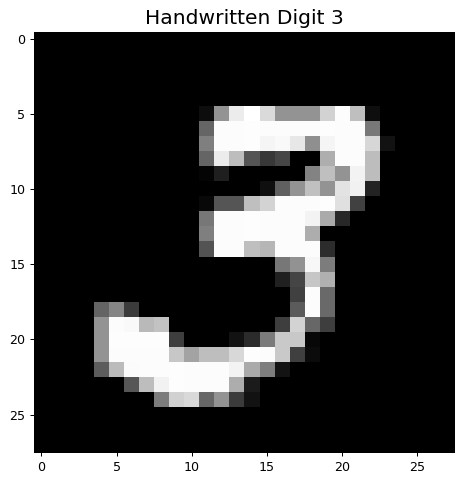

In [ ]:
#Create an image of one of the sample images of digit 3.
sample_of_three_test_pixels = threes_test_df.iloc[4, 1:].values.reshape(28, 28)

plt.figure(figsize = (6, 6), dpi = 91)
plt.title("Handwritten Digit 3", fontsize = 16)
plt.imshow(sample_of_three_test_pixels, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

You can also create a Python function to visualise exactly one sample image of each digit that exists in the `test_df` data frame. This function takes the digit as input for which one sample image needs to be created and returns the corresponding image as an output. Let's refer to this input value by the `digit_in_grouped_df` variable.

In this function:

1. Get a data frame containing the pixel values of all the images for a digit (referred to as `digit_in_grouped_df`).

2. For this digit (referred to as `digit_in_grouped_df`), get the row number of its first sample in the `test_df` data frame.

3. Create a $28 \times 28$ 2D NumPy array for the pixel values of this sample image for the digit.

4. Use the NumPy array, to create the required image.

After creating the Python function, use a for loop to generate numbers from 0 to 0 (including both) and then create one sample image that exists in the `test_df` data frame corresponding to these digits.

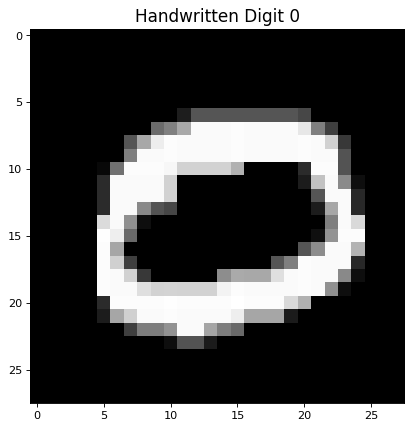

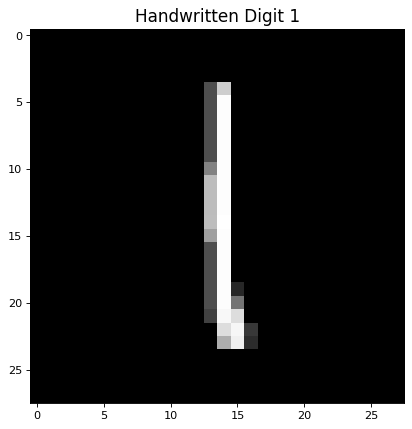

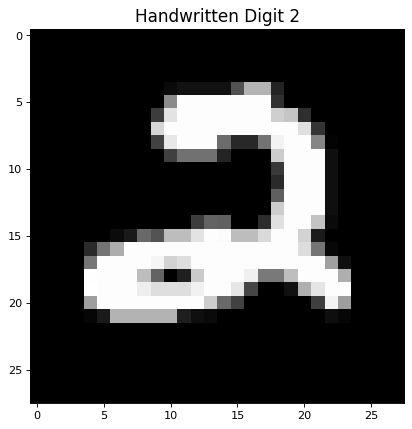

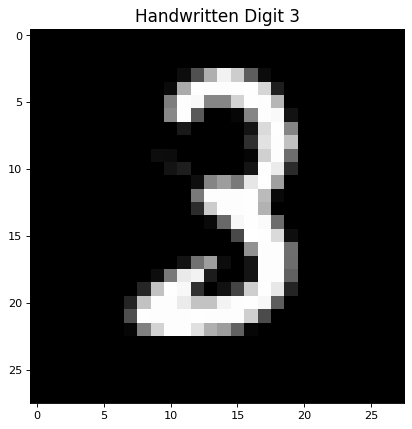

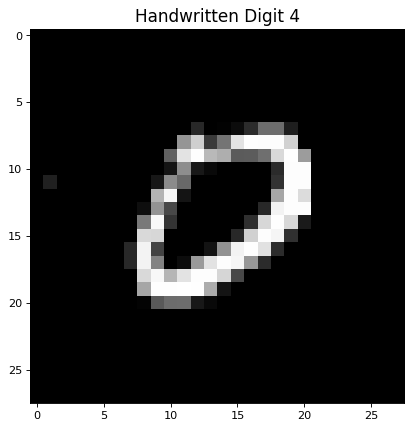

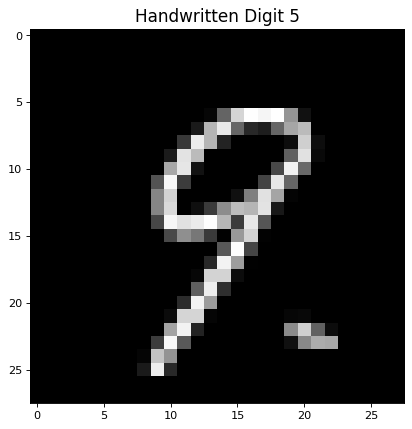

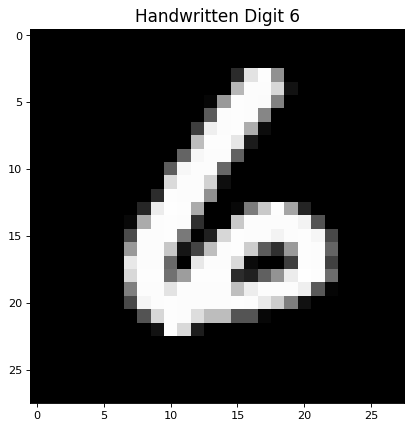

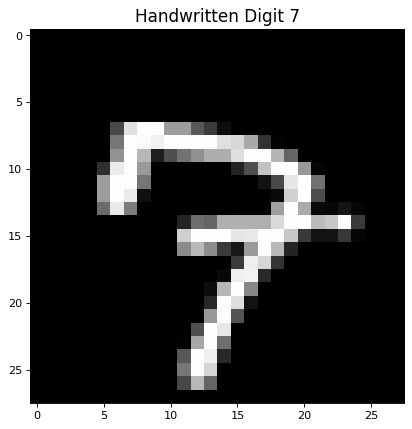

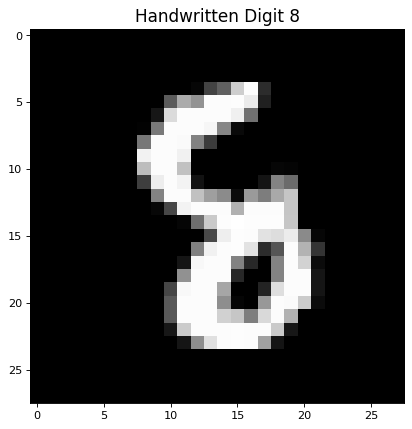

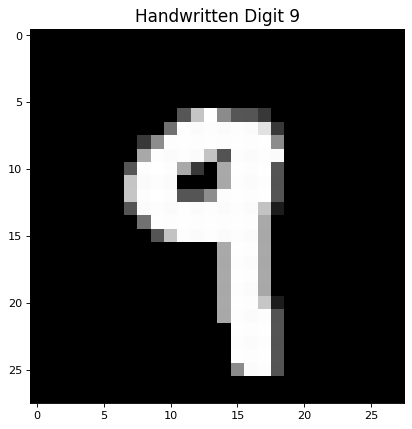

In [ ]:
# Create a Python function to visualise exactly one sample image of a digit that exists in the 'test_df' data frame. Also, create the images.
def visualising_handwritten_digits(digit_in_grouped_test_df):
  digit_pixels_df = grouped_test_df.get_group(digit_in_grouped_test_df)
  digit_pixels_row_number = digit_pixels_df.index.values[0]
  digit_pixels_array = test_df.iloc[digit_pixels_row_number, 1:].values.reshape(28, 28)
  plt.figure(figsize = (6, 6), dpi = 81)
  plt.title(f"Handwritten Digit {digit_in_grouped_test_df}", fontsize = 15)
  plt.imshow(digit_pixels_array, cmap = "gray", vmin = 0, vmax = 255)
  plt.show()

for i in range(10):
  visualising_handwritten_digits(i)

As you can see, we have created images for one sample corresponding to each handwritten digit that exists in the `test_df` data frame.

**Note:** A couple of images may be misclassified because the prediction model that we built using the linear kernel of support vector machines is not 100% accurate. Also, we are creating the image of the first sample of a digit that exists in the `test_df` data frame. It may not be necessarily predicted correctly.

In the above code:

1. `digit_pixels_df = grouped_test_df.get_group(digit_in_grouped_test_df)` creates a data frame for all the pixel values of the images of only a particular digit (referred to as `digit_in_grouped_test_df`)

2. `digit_pixels_row_number = digit_pixels_df.index.values[0]` gets the row number for the first occurance of the pixel values of an image of a digit that exists in the `test_df`.

3. `digit_pixels_array = test_df.iloc[digit_pixels_row_number, 1:].values.reshape(28, 28)` creates a 2D NumPy array of $28 \times 28$ shape containing the pixel values of one sample image for a digt that appears first time in the `test_df` data frame.

4. ```
  plt.figure(figsize = (6, 6), dpi = 81)
  plt.title(f"Handwritten Digit {digit_in_grouped_test_df}", fontsize = 15)
  plt.imshow(digit_pixels_array, cmap = "gray", vmin = 0, vmax = 255)
  plt.show()
  ```
  creates image for the pixel values of one sample image for a digt that appears first time in the `test_df` data frame.

So this is how you can classify images using the linear kernel of an SVC model.

